In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

## Cargar los datos

Abrir el archivo "diabetes.csv" en la carpeta "data". Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?
*   ¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba.

In [4]:
#leo el archivo csv
df = pd.read_csv('data/diabetes.csv')

#instancias del dataset
print(df.shape)

#variable de salida: Outcome de tipo int
print(df.Outcome.unique())

#cantidad de atributos que posea cada instancia
print(df.count())

#deteccion de datos faltantes
print(df.isnull().sum())

#tipo de dato de cada atributo
print(df.dtypes)

#no hay datos categoricos. Todos son numericos

(768, 10)
[1 0]
Unnamed: 0                  768
Pregnancies                 768
Glucose                     768
BloodPressure               767
SkinThickness               756
Insulin                     763
BMI                         767
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64
Unnamed: 0                   0
Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                      5
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64
Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outc

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


Analice con cuidado el rango de valores de los atributos. ¿Nota valores atípicos a simple vista en algún/algunos de los atributos?

       Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     767.000000     756.000000   
mean   383.500000     3.845052  120.894531      69.195567      20.862434   
std    221.846794     3.369578   31.972618      19.206609      15.865314   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      63.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  \
count  763.000000  767.000000                768.000000  768.000000   
mean    80.322412   32.034289                  0.471876   33.240885   
std    115.439459    7.804050                  0.331329   11.760232   
min      0.000000    0.000000  

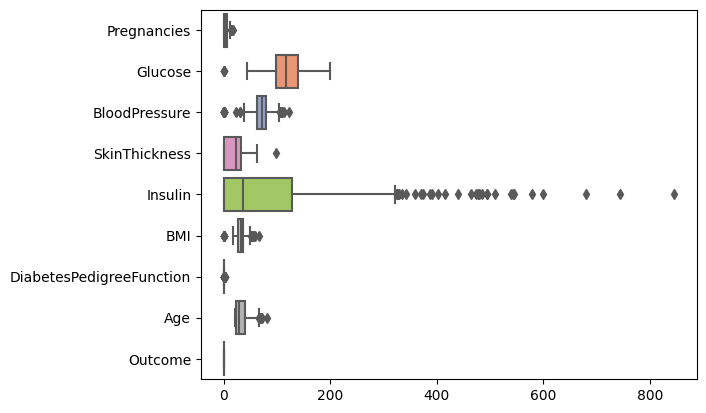

In [5]:
#rango de valores de los atributos
print(df.describe())

#elimino la columna unamed:0
df.drop('Unnamed: 0', axis=1, inplace=True)

#hallo valores atipicos usando un boxplot con todos los atributos:
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()


In [6]:
#analizo los valores atipicos de la variable de salida:
#Datos faltantes luego de realizar el reemplazo:
print("Datos faltantes en los datos de entrenamiento:")
print(df.isnull().sum())

Datos faltantes en los datos de entrenamiento:
Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                      5
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


Estos valores atípicos encontrados a simple vista es mejor tratarlos como datos faltantes. Utilice el método **[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)** de pandas para reemplazarlos por `np.NaN`



In [7]:
#separo datos de entrenamiento y prueba:
from sklearn.model_selection import train_test_split
df_train_set, df_test_set = train_test_split(df, test_size=0.2, stratify=df['Outcome'], random_state=42)
#stratify= proporcion de las clase outcome
#veo datos faltantes:
print("Datos faltantes en los datos de entrenamiento:")
print(df_train_set.isnull().sum())
print("-----------------------------------------")
print("Datos faltantes en los datos de prueba:")
print(df_test_set.isnull().sum())

Datos faltantes en los datos de entrenamiento:
Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               11
Insulin                      5
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64
-----------------------------------------
Datos faltantes en los datos de prueba:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
#uso el metodo replace para reemplazar los 0 por np.nan: 
df_train_set['Glucose'] = df_train_set['Glucose'].replace(0, np.NaN)
df_train_set['BloodPressure'] = df_train_set['BloodPressure'].replace(0, np.NaN)
df_train_set['SkinThickness'] = df_train_set['SkinThickness'].replace(0, np.NaN)
df_train_set['BMI'] = df_train_set['BMI'].replace(0, np.NaN)

df_test_set['Glucose'] = df_test_set['Glucose'].replace(0, np.NaN)
df_test_set['BloodPressure'] = df_test_set['BloodPressure'].replace(0, np.NaN)
df_test_set['SkinThickness'] = df_test_set['SkinThickness'].replace(0, np.NaN)
df_test_set['BMI'] = df_test_set['BMI'].replace(0, np.NaN)


In [9]:
#veo datos faltantes:
print("Datos faltantes en los datos de entrenamiento:")
print(df_train_set.isnull().sum())
print("-----------------------------------------")
print("Datos faltantes en los datos de prueba:")
print(df_test_set.isnull().sum())

Datos faltantes en los datos de entrenamiento:
Pregnancies                   0
Glucose                       4
BloodPressure                23
SkinThickness               175
Insulin                       5
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
-----------------------------------------
Datos faltantes en los datos de prueba:
Pregnancies                  0
Glucose                      1
BloodPressure               12
SkinThickness               52
Insulin                      0
BMI                          2
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [10]:
#separo en diabeticos y no diabeticos del train set:
df_train_set_diabeticos = df_train_set[df_train_set['Outcome'] == 1]
df_train_set_no_diabeticos = df_train_set[df_train_set['Outcome'] == 0]

#creo dos imputers, uno para diabeticos y otro para no diabeticos:
from sklearn.impute import SimpleImputer
imputer_diabeticos = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_no_diabeticos = SimpleImputer(missing_values=np.nan, strategy='median')

#entreno:
imputer_diabeticos.fit(df_train_set_diabeticos)
imputer_no_diabeticos.fit(df_train_set_no_diabeticos)


SimpleImputer(strategy='median')

In [11]:
#transformo dependiendo del outcome:
for index in df_train_set.index:
    if df_train_set.loc[index, 'Outcome'] == 1:
        df_train_set.loc[index, :] = imputer_diabeticos.transform([df_train_set.loc[index, :]])
    else:
        df_train_set.loc[index, :] = imputer_no_diabeticos.transform([df_train_set.loc[index, :]])

#cuento la cantidad de datos faltantes:
print("Datos faltantes en los datos de entrenamiento:")
print(df_train_set.isnull().sum())

c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Simple

Datos faltantes en los datos de entrenamiento:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Simple

In [12]:
#aplico imputer a datos de testeo:
for index in df_test_set.index:
    if df_test_set.loc[index, 'Outcome'] == 1:
        df_test_set.loc[index, :] = imputer_diabeticos.transform([df_test_set.loc[index, :]])
    else:
        df_test_set.loc[index, :] = imputer_no_diabeticos.transform([df_test_set.loc[index, :]])
        

c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Simple

In [13]:
#separo target del resto de los atributos:
diabetes_train_target = df_train_set['Outcome']
diabetes_train = df_train_set.drop('Outcome', axis=1)

diabetes_test_target = df_test_set['Outcome']
diabetes_test = df_test_set.drop('Outcome', axis=1)


#normalizo los datos:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(diabetes_train)
diabetes_train_sc = scaler.transform(diabetes_train)
diabetes_test_sc = scaler.transform(diabetes_test)


## Datos Faltantes

Grafique el histograma de cada atributo con datos faltantes y decida que valor utilizar (media o mediana) para imputar, en función de la distribución que tienen los datos. Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
Puede utilizar el parámetro alpha para darle transparencia a los histogramas y agregar una leyenda para identificar la clase.

### ⚠️
**Aclaración:** Algo a tener en cuenta en este ejemplo es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/ sin diabetes). Una persona sana tendrá un valor de insulina en un rango distinto a una persona no sana. Por tanto es recomendable graficar el histograma por atributo y por clase, de igual manera, calcular la media o mediana según la clase e imputar un valor teniendo en cuenta el mismo criterio.

Si lo deseea puede implementar su propio transformer para imputar datos de forma condicional, dependiendo de la clase y un pipeline para la preparación completa de los datos.

Después de la preparación de datos, entrene 3 clasificadores (KNN, LDA, SVM con kernel gaussiano) y compare sus desempeños (usando la métrica de Accuracy).

In [14]:
#entreno clasificador knn:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p = 2, metric='minkowski')
knn.fit(diabetes_train_sc, diabetes_train_target)

#realizo una prediccion:
y_pred = knn.predict(diabetes_test_sc)

#veo el accuracy:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(diabetes_test_target, y_pred))

Accuracy: 0.7402597402597403


In [15]:
#entreno clasificador lda:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(diabetes_train_sc, diabetes_train_target)

#realizo una prediccion:
y_pred = lda.predict(diabetes_test_sc)

#veo el accuracy:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(diabetes_test_target, y_pred))



Accuracy: 0.7012987012987013


In [16]:
#entreno clasificador svm con kernel gaussiano:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(diabetes_train_sc, diabetes_train_target)

#realizo una prediccion:
y_pred = svm.predict(diabetes_test_sc)

#veo el accuracy:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(diabetes_test_target, y_pred))


Accuracy: 0.7467532467532467
